In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.pylab import subplots
import matplotlib.mlab as mlab
import matplotlib.patches as patches
from scipy import interpolate 

In [49]:
pl

,Unnamed: 0,Player Name,Player Category,Age,Height,Weight,Overall Rating,Value,Wage,Crossing,...,Power,Defending,Goalkeeping,Attacking+Skill,Mentality,Midfielding,Hight (cm),BMI,Value(K),Wafe(K)
0,0,L. Messi,Striker,31,"5'7""",159,94,€110.5M,€565K,86,...,77.0,29.000000,10.8,89.8,71.500000,92.0,170.18,24.902667,110500.0,565.0
1,1,Cristiano Ronaldo,Striker,33,"6'2""",183,94,€77M,€405K,84,...,90.0,27.333333,11.6,85.1,74.833333,84.8,187.96,23.495570,77000.0,405.0
2,2,Neymar Jr,Midfielder,26,"5'9""",150,92,€108M,€290K,83,...,70.6,28.000000,11.8,84.6,74.000000,87.6,175.26,22.150902,108000.0,290.0
3,3,De Gea,GoalKeeper,27,"6'4""",168,91,€72M,€260K,17,...,43.4,19.666667,88.6,26.1,43.000000,34.8,193.04,20.449394,72000.0,260.0
4,4,K. De Bruyne,Midfielder,27,"5'11""",154,91,€102M,€355K,93,...,81.8,59.000000,11.2,84.0,81.166667,90.6,180.34,21.478421,102000.0,355.0
5,5,E. Hazard,Striker,27,"5'8""",168,91,€93M,€340K,81,...,73.4,27.666667,9.0,82.9,74.666667,88.4,172.72,25.544052,93000.0,340.0
6,6,L. Modrić,Midfielder,32,"5'8""",146,91,€67M,€420K,86,...,75.2,72.333333,10.4,81.5,81.333333,89.8,172.72,22.198998,67000.0,420.0
7,7,L. Suárez,Striker,20,"6'1""",163,67,€1.2M,€13K,59,...,63.0,25.000000,8.8,61.8,52.166667,60.4,185.42,21.505038,1200.0,13.0
8,8,H. Kane,Midfielder,19,"5'10""",148,66,€1M,€11K,45,...,59.8,56.000000,10.4,56.8,59.166667,62.2,177.80,21.235572,1000.0,11.0
9,9,J. Oblak,GoalKeeper,25,"6'2""",192,90,€68M,€94K,13,...,45.8,19.000000,86.6,16.2,35.000000,19.2,187.96,24.651090,68000.0,94.0


In [57]:
fname='player_attributes.csv'
pl=pd.read_csv(fname)
pl['Attacking']=pl.loc[:,['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys']].mean(1)
pl['Skill']=pl.loc[:,['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control']].mean(1)
pl['Movement']=pl.loc[:,['Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance']].mean(1)
pl['Power']=pl.loc[:,['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']].mean(1)
pl['Defending']=pl.loc[:,['Marking', 'Standing Tackle', 'Sliding Tackle']].mean(1)
pl['Goalkeeping']=pl.loc[:,['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].mean(1)
pl['Attacking+Skill']=pl.loc[:,['Attacking','Skill']].mean(1)
pl['Mentality']=pl.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
pl['Midfielding']=pl.loc[:,['Short Passing', 'Dribbling', 'Ball Control', 'Long Passing', 'Crossing']].mean(1)
ph=pl['Height'].tolist()
ph=[i.strip('""').split('\'') for i in ph]
ph=np.array([(int(i[0])*12+int(i[1]))*2.54 for i in ph])
pl['Hight (cm)']=ph
pw=pl['Weight'].values*0.4535924
BMI=pw/ph**2*1e4
pl['BMI']=BMI
pv=pl['Value'].tolist()
pvk=np.array([(i[-1]=='M')*1000+(i[-1]=='K') for i in pv])
pvn=np.array([float(i[1:].strip('M').strip('K'))for i in pv])
pl['Value(K)']=pvn*pvk
plw=pl['Wage'].tolist()
plwk=[float(i[1:].strip('K')) for i in plw]
pl['Wage(K)']=plwk

In [3]:
AA=['Attacking']
MA=['Movement']
DA=['Defending']
GKA=['Goalkeeping']
PA=['Power']
MDA=['Midfielding']
AA2=['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Attacking']
MA2=['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',]
DA2=['Marking', 'Standing Tackle', 'Sliding Tackle']
GKA2=['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
PA2=['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']
MDA2=['Short Passing', 'Dribbling', 'Ball Control', 'Long Passing', 'Crossing']

In [58]:
plp=pl.groupby('Player Category')
sp=plp.get_group('Striker')
gp=plp.get_group('GoalKeeper')
mp=plp.get_group('Midfielder')
dp=plp.get_group('Defender')

In [59]:
pl.loc[pl.index[pl['Player Category']=='Striker'],'Mentality']=sp.loc[:,['Aggression', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
pl.loc[pl.index[pl['Player Category']=='Defender'],'Mentality']=dp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean(1)
op=pd.concat([sp,mp,dp])

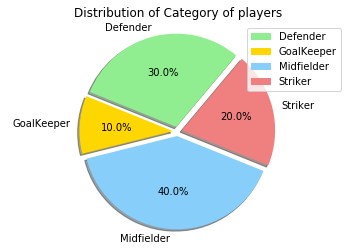

In [60]:
sizes=plp.count()['Hight (cm)']
explode=[0.05,0.05,0.05,0.05]
labels=['Defender','GoalKeeper','Midfielder','Striker']
colors=['lightgreen','gold','lightskyblue','lightcoral']
pie=plt.pie(sizes,explode=explode, shadow=True,labels=labels,colors=colors,autopct='%1.1f%%',startangle=50)
plt.axis('equal')
plt.title('Distribution of Category of players')
plt.legend()
plt.savefig("./graph/Distribution of Category of players.png")

In [61]:
opH=op.groupby('Hight (cm)').mean()
opW=op.groupby('Weight').mean()
opB=op.groupby('BMI').mean()
gpH=gp.groupby('Hight (cm)').mean()
gpW=gp.groupby('Weight').mean()
gpB=gp.groupby('BMI').mean()

In [62]:
def ddraw(item,unit=''):
    x=pl[item]
    bins = np.linspace(x.min(),x.max(),10)
    x1 = np.linspace(x.min(), x.max(), 100)
    normal = norm.pdf(x1, x.mean(), x.std())*x.count()*(bins[1]-bins[0])
    kde = mlab.GaussianKDE(x)
    p1=plt.hist([dp[item],mp[item],sp[item],gp[item]], bins = bins,rwidth=0.8,edgecolor = 'k',stacked= True,label=['Defender','Midfielder','Striker','GoalKeeper'])
    plt.plot(x1,kde(x1)*x.count()*(bins[1]-bins[0]),linewidth = 3,label='Kernel density')
    plt.plot(x1,normal,label='Normal distribution',linewidth = 3)
    plt.grid(True)
    plt.xlabel(item+unit)
    plt.ylabel('Number of players')
    plt.legend(loc= 'best')
    if item== 'Hight (cm)':
        item='Height'
    plt.title('Distribution of '+item)
    plt.savefig('./graph/'+'Distribution of '+item+'.png')

In [135]:
def ddrawh(h,m):
    item='Wage(K)'
    dph=dp.head(h)
    sph=sp.head(h)
    mph=mp.head(h)
    gph=gp.head(h)
    dpi=dph[item]
    spi=sph[item]
    mpi=mph[item]
    gpi=gph[item]
    x=pd.concat([dph,sph,mph,gph])[item]
    bins = np.linspace(x.min(),x.max(),10)
    db=bins[1]-bins[0]
    x1 = np.linspace(x.min(), x.max(), 100)
    normals = norm.pdf(x1, spi.mean(), spi.std())*h*db
    normalm = norm.pdf(x1, mpi.mean(), mpi.std())*h*db
    normald = norm.pdf(x1, dpi.mean(), dpi.std())*h*db
    normalg = norm.pdf(x1, gpi.mean(), gpi.std())*h*db
    kde = mlab.GaussianKDE(x)
    p1=plt.hist([sph[item],mph[item],dph[item],gph[item]], bins = bins,rwidth=0.8,\
                edgecolor = 'k',stacked= True,\
                label=['Striker','Midfielder','Defender','GoalKeeper']\
              ,alpha=0.8)
    plt.plot(x1,normals,label='Striker',linewidth = 3,color='red')
    plt.plot(x1,normalm,label='Midfielder',linewidth = 3,color='yellow')
    plt.plot(x1,normald,label='Defender',linewidth = 3,color='b')
    plt.plot(x1,normalg,label='GoalKeeper',linewidth = 3,color='lime')
    plt.grid(True)
    plt.xlabel(item)
    plt.ylabel('Number of players')
    plt.legend(loc= 'best')
    plt.title('Distribution of Wage'+' of top'+str(h)+' players')
    plt.xlim([0,m])
 

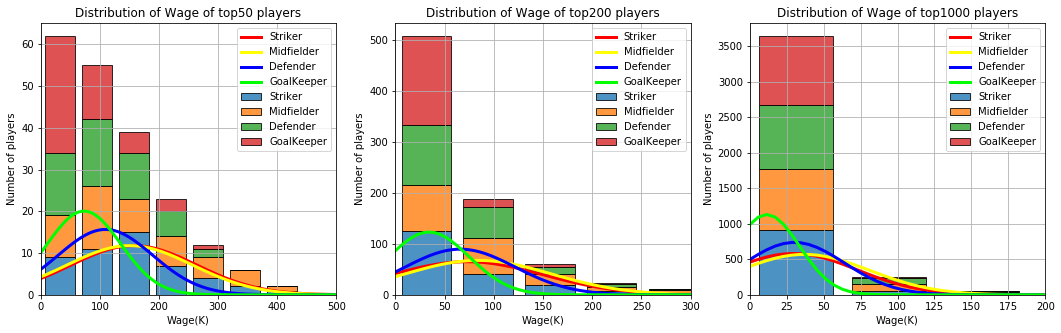

In [136]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
ddrawh(50,500)
plt.subplot(1,3,2)
ddrawh(200,300)
plt.subplot(1,3,3)
ddrawh(1000,200)
plt.savefig('./graph/Wage.png')

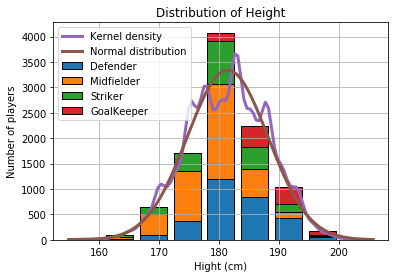

In [9]:
ddraw('Hight (cm)')

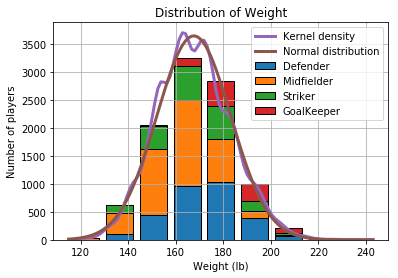

In [10]:
ddraw('Weight',' (lb)')

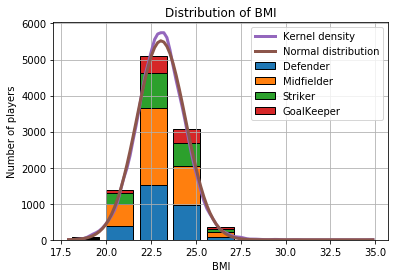

In [11]:
ddraw('BMI')

In [12]:
def ptw(x,item,ply):
    fig,axs=subplots(1,3,figsize=(20, 5))
    for i in range(3):
        x1=x[i].index.values
        y1=x[i][item].values
        xv=np.linspace(min(x1),max(x1),100)
        fl=interpolate.interp1d(x1, y1)
        xname=x[i].index.name
        dx=ply[xname]
        #normal = norm.pdf(xv, dx.mean(), dx.std())
        normal=mlab.GaussianKDE(dx)(xv)
        normal=normal+max(normal)/2
        ax=axs[i]
        d=xv[1]-xv[0]    
        for j in range(99):
            ax.add_patch(patches.Rectangle((xv[j],0),d,fl(xv[j]),color='b',linewidth=0,alpha=normal[j]/max(normal)))  
        #ax.plot(x1, y1, '--',linewidth=0)
        ax.set_xlabel(xname+' (lb)'*(xname=='Weight'))    
        ax.set_ylabel(item)
        if xname== 'Hight (cm)':
            xname='Height'
        ax.set_title(item +' vs '+xname)    
        ax.grid(True)
        ax.set_ylim([0,100])
        ax.set_xlim([min(xv),max(xv)])
    fig.savefig('./graph/'+item+'.png')

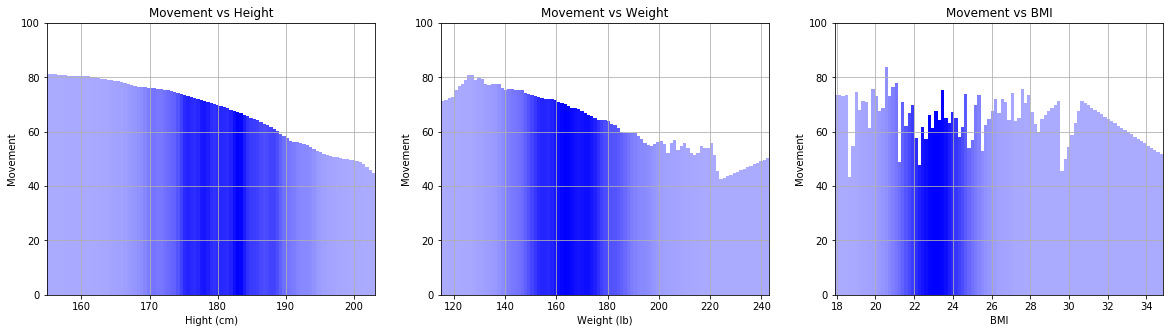

In [13]:
x=[opH,opW,opB]
ply=pd.concat([sp,mp,dp])
ptw(x,'Movement',ply)

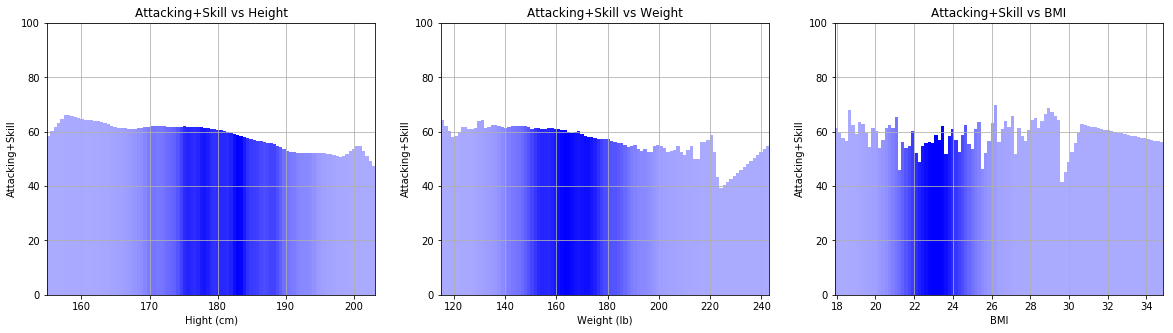

In [14]:
ptw(x,'Attacking+Skill',ply)

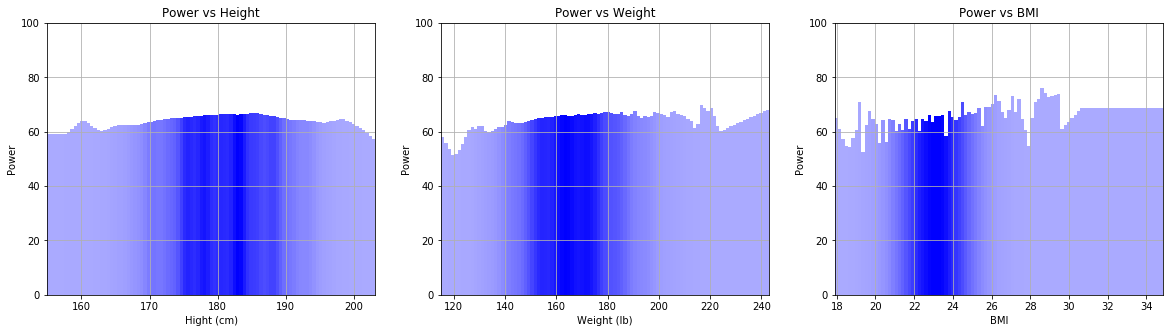

In [15]:
ptw(x,'Power',ply)

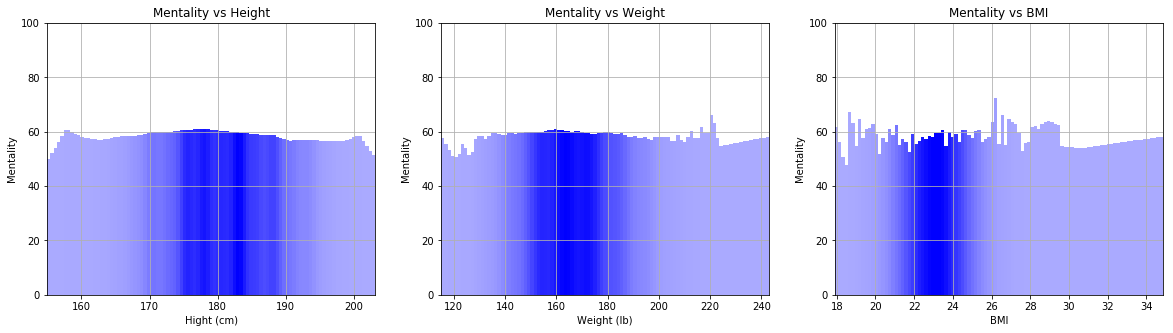

In [16]:
ptw(x,'Mentality',ply)

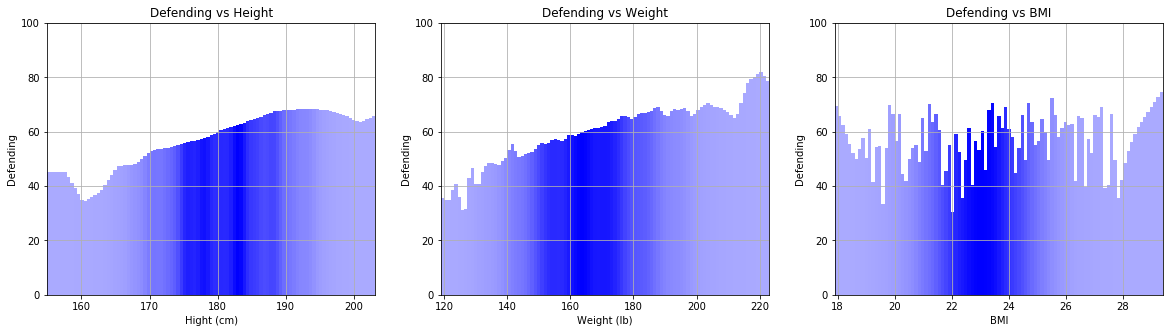

In [17]:
oop=pd.concat([mp,dp])
oopH=oop.groupby('Hight (cm)').mean()
oopW=oop.groupby('Weight').mean()
oopB=oop.groupby('BMI').mean()
x=[oopH,oopW,oopB]
ptw(x,'Defending',oop)

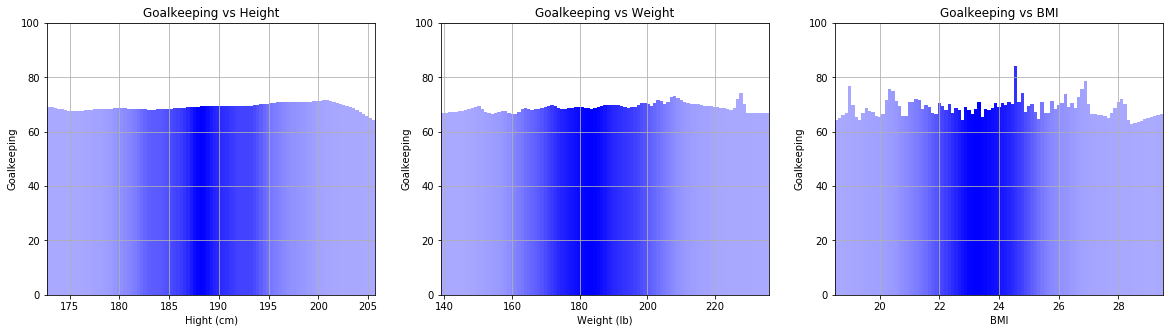

In [18]:
x=[gpH,gpW,gpB]
ptw(x,'Goalkeeping',gp)

In [19]:
def pWH(x,items,ply,pln,itemn):
    l=len(items)
    fig,axs=subplots(l,2,figsize=(12, 6*l))
    for j in range(l):
        item=items[j]
        for i in range(2):
            x1=x[i].index.values
            y1=x[i][item].values
            xv=np.linspace(min(x1),max(x1),500)
            fl=interpolate.interp1d(x1, y1)
            xname=x[i].index.name
            dx=ply[xname]
            #normal = norm.pdf(xv, dx.mean(), dx.std())
            normal=mlab.GaussianKDE(dx)(xv)
            normal=normal+max(normal)/2
            if l>1:
                ax=axs[j,i]
            else:
                ax=axs[i]
            d=xv[1]-xv[0]    
            for k in range(499):
                ax.add_patch(patches.Rectangle((xv[k],0),d,fl(xv[k]),color='b',linewidth=0,alpha=normal[k]/max(normal)))  
            ax.set_xlabel(xname+' (lb)'*(xname=='Weight'))    
            ax.set_ylabel(item)
            if xname== 'Hight (cm)':
                xname='Height'
            ax.set_title(item +' vs '+xname+' for '+pln)    
            ax.grid(True)
            ax.set_ylim([0,100])
            ax.set_xlim([min(xv),max(xv)])
    fig.savefig('./graph/'+itemn+' of '+pln+'.png')

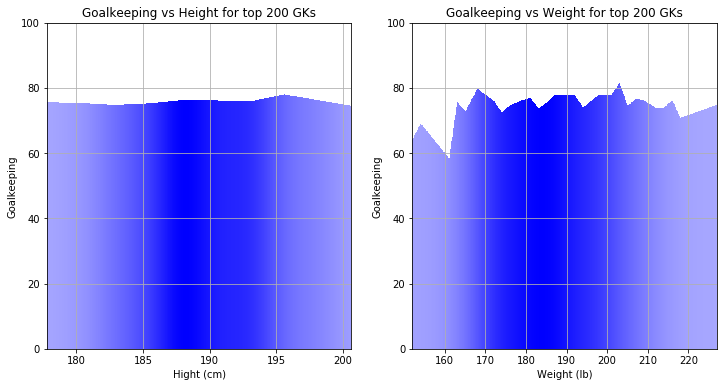

In [20]:
gpt=gp.iloc[:200,:]
gptH=gpt.groupby('Hight (cm)').mean()
gptW=gpt.groupby('Weight').mean()
gptB=gpt.groupby('BMI').mean()
x=[gptH,gptW,gptB]
pWH(x,GKA,gpt,'top 200 GKs','Goalkeeping')

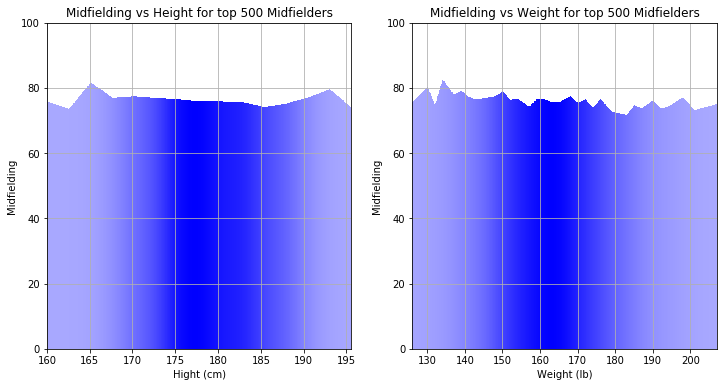

In [21]:
mpt=mp.iloc[:500,:]
mptH=mpt.groupby('Hight (cm)').mean()
mptW=mpt.groupby('Weight').mean()
mptB=mpt.groupby('BMI').mean()
x=[mptH,mptW,mptB]
pWH(x,MDA,mpt,'top 500 Midfielders','Midfielding')

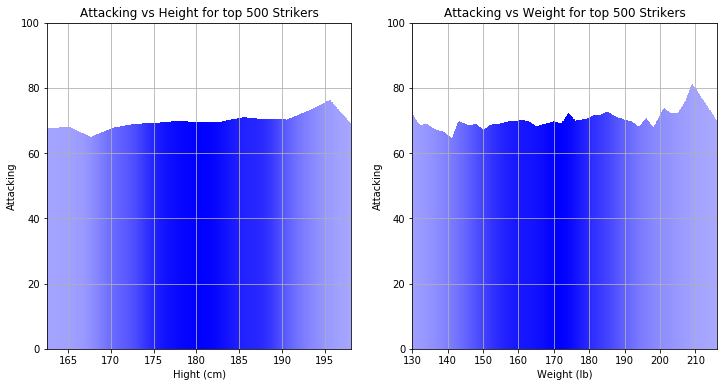

In [23]:
spt=sp.iloc[:500,:]
sptH=spt.groupby('Hight (cm)').mean()
sptW=spt.groupby('Weight').mean()
sptB=spt.groupby('BMI').mean()
x=[sptH,sptW,sptB]
pWH(x,AA,spt,'top 500 Strikers','Attacking')

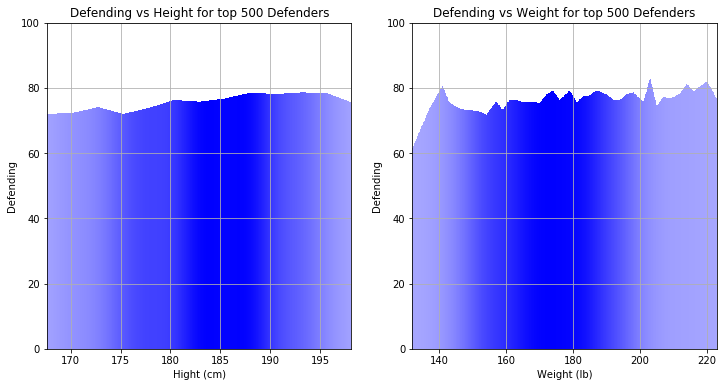

In [24]:
dpt=dp.iloc[:500,:]
dptH=dpt.groupby('Hight (cm)').mean()
dptW=dpt.groupby('Weight').mean()
dptB=dpt.groupby('BMI').mean()
x=[dptH,dptW,dptB]
pWH(x,DA,dpt,'top 500 Defenders','Defending')

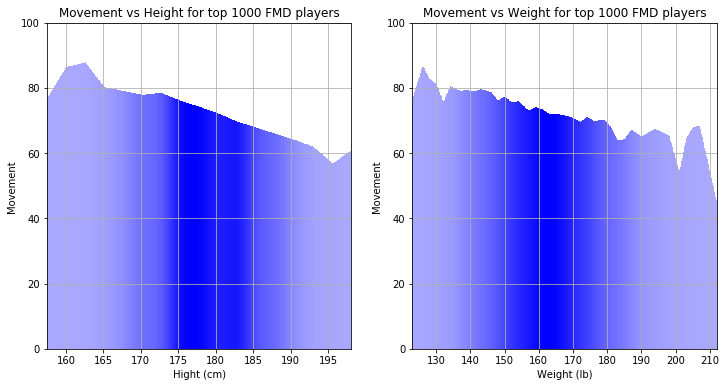

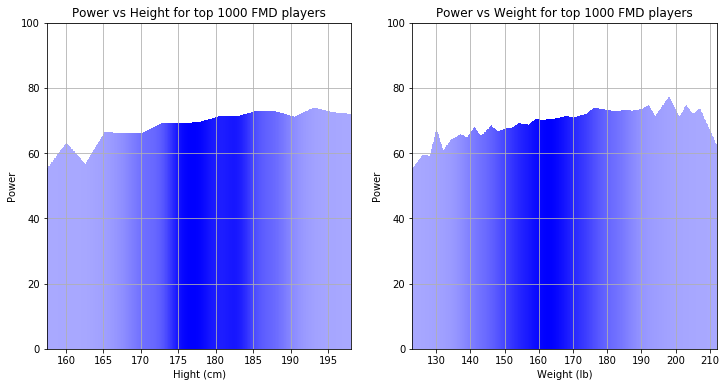

In [25]:
opt=mp.iloc[:1000,:]
optH=opt.groupby('Hight (cm)').mean()
optW=opt.groupby('Weight').mean()
optB=opt.groupby('BMI').mean()
x=[optH,optW,optB]
pWH(x,MA,opt,'top 1000 FMD players','Movement')
pWH(x,PA,opt,'top 1000 FMD players','Power')

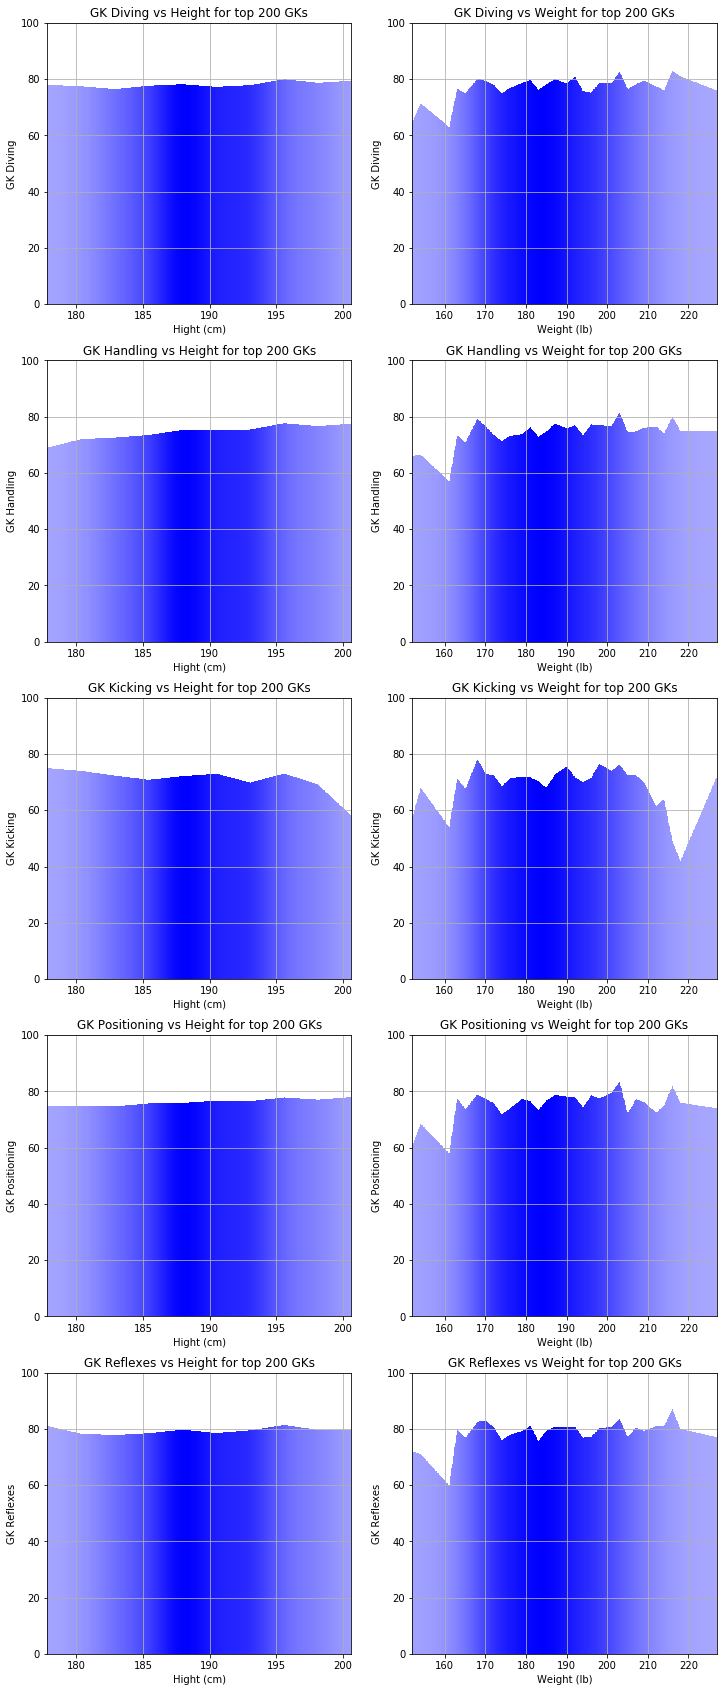

In [26]:
gpt=gp.iloc[:200,:]
gptH=gpt.groupby('Hight (cm)').mean()
gptW=gpt.groupby('Weight').mean()
gptB=gpt.groupby('BMI').mean()
x=[gptH,gptW,gptB]
pWH(x,GKA2,gpt,'top 200 GKs','GK attributes')

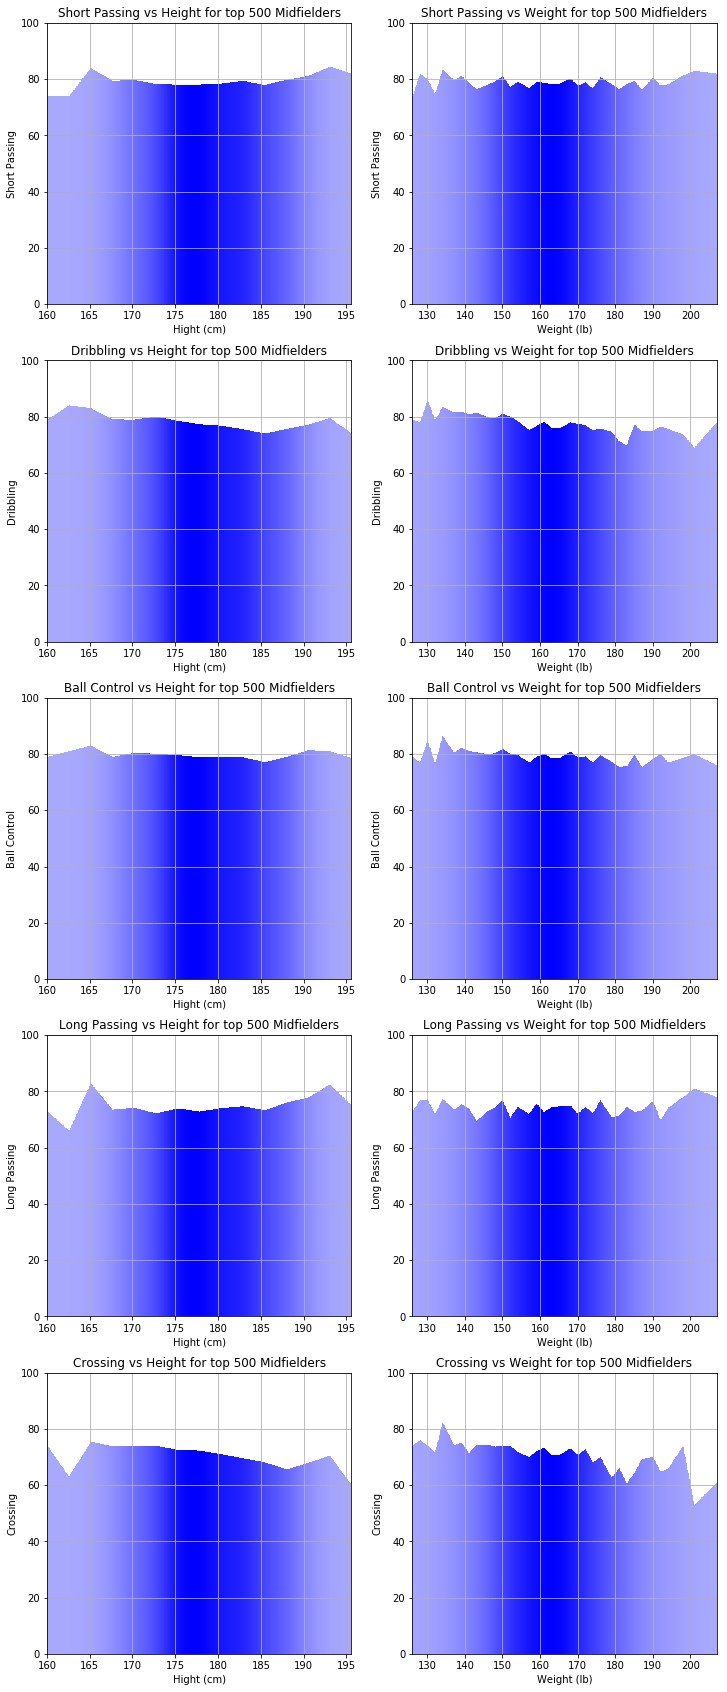

In [27]:
mpt=mp.iloc[:500,:]
mptH=mpt.groupby('Hight (cm)').mean()
mptW=mpt.groupby('Weight').mean()
mptB=mpt.groupby('BMI').mean()
x=[mptH,mptW,mptB]
pWH(x,MDA2,mpt,'top 500 Midfielders','Midfielding attributes')

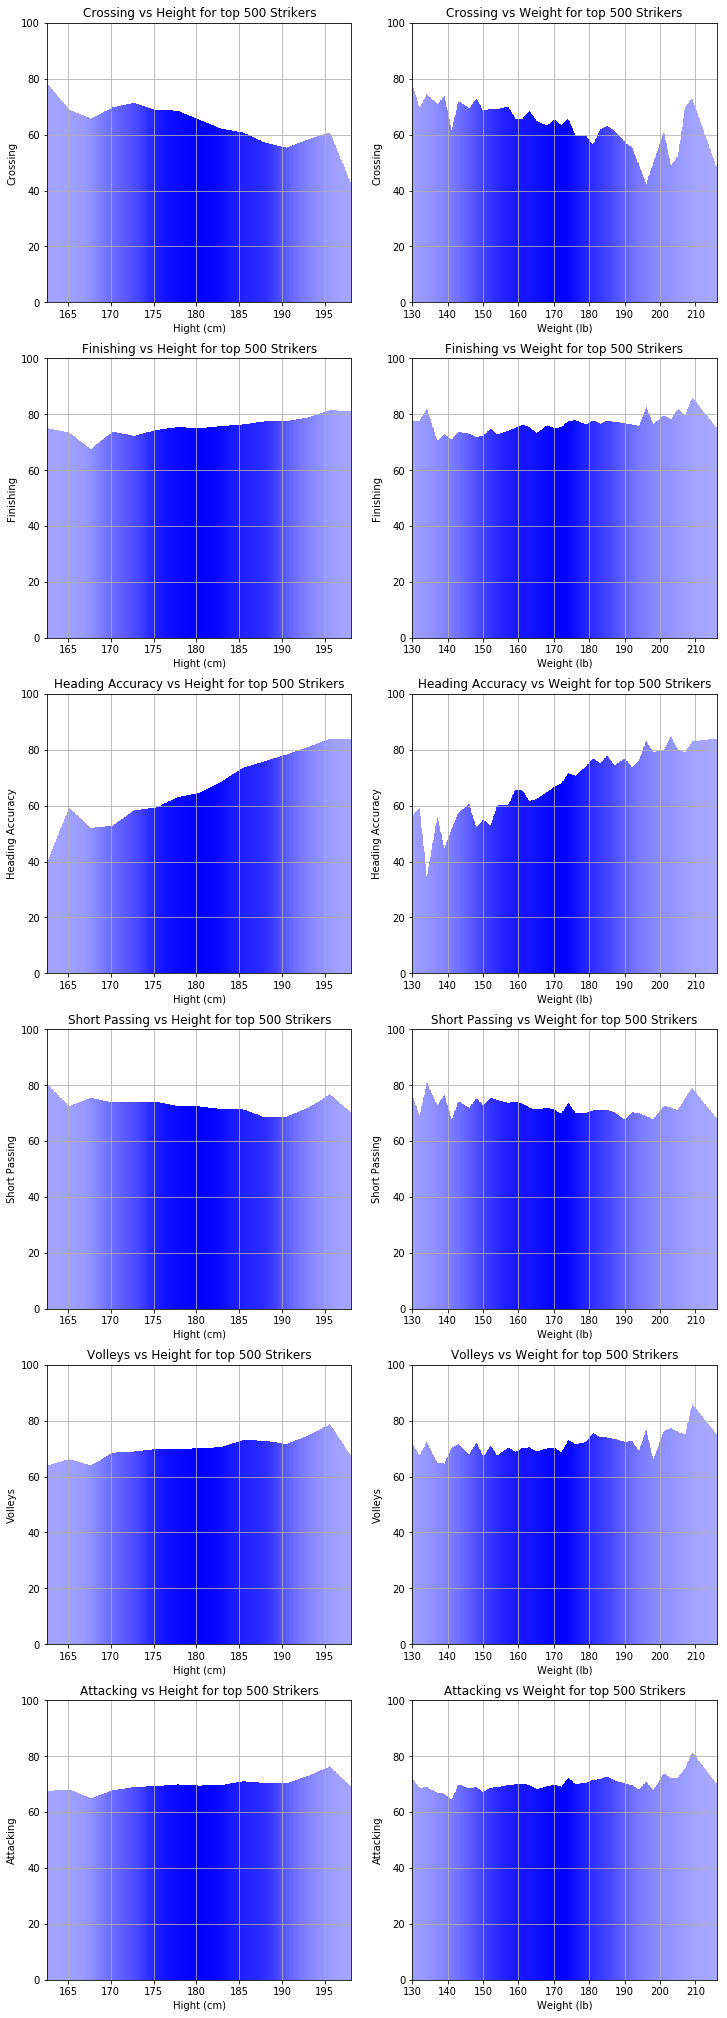

In [28]:
spt=sp.iloc[:500,:]
sptH=spt.groupby('Hight (cm)').mean()
sptW=spt.groupby('Weight').mean()
sptB=spt.groupby('BMI').mean()
x=[sptH,sptW,sptB]
pWH(x,AA2,spt,'top 500 Strikers','Attacking attributes')

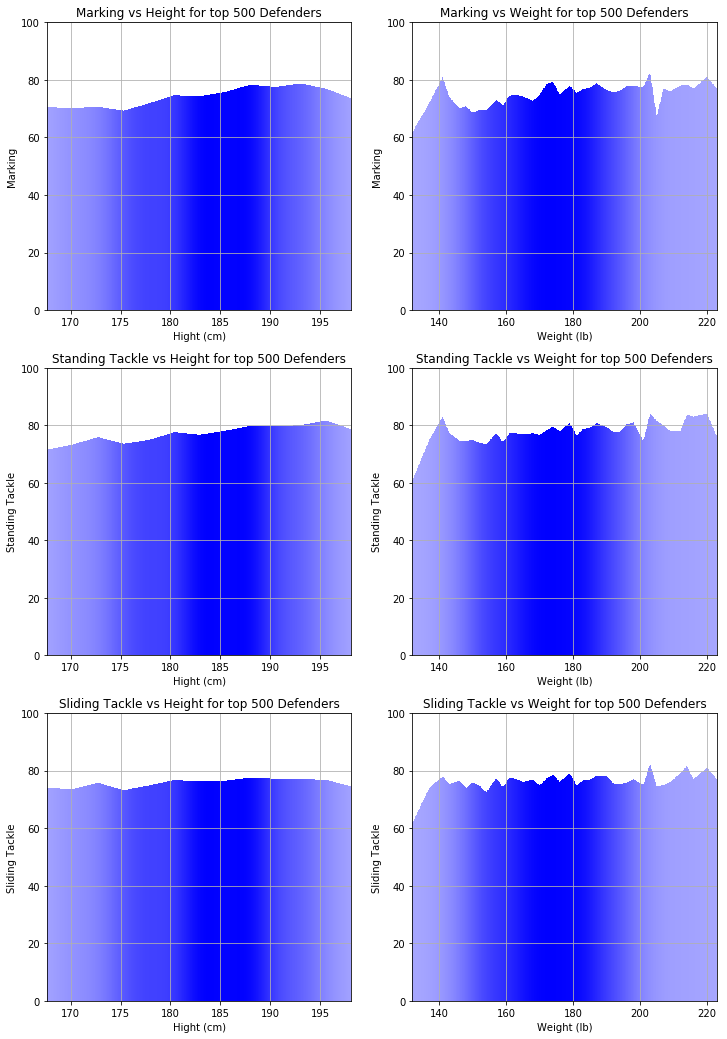

In [29]:
dpt=dp.iloc[:500,:]
dptH=dpt.groupby('Hight (cm)').mean()
dptW=dpt.groupby('Weight').mean()
dptB=dpt.groupby('BMI').mean()
x=[dptH,dptW,dptB]
pWH(x,DA2,dpt,'top 500 Defenders','Defending attributes')

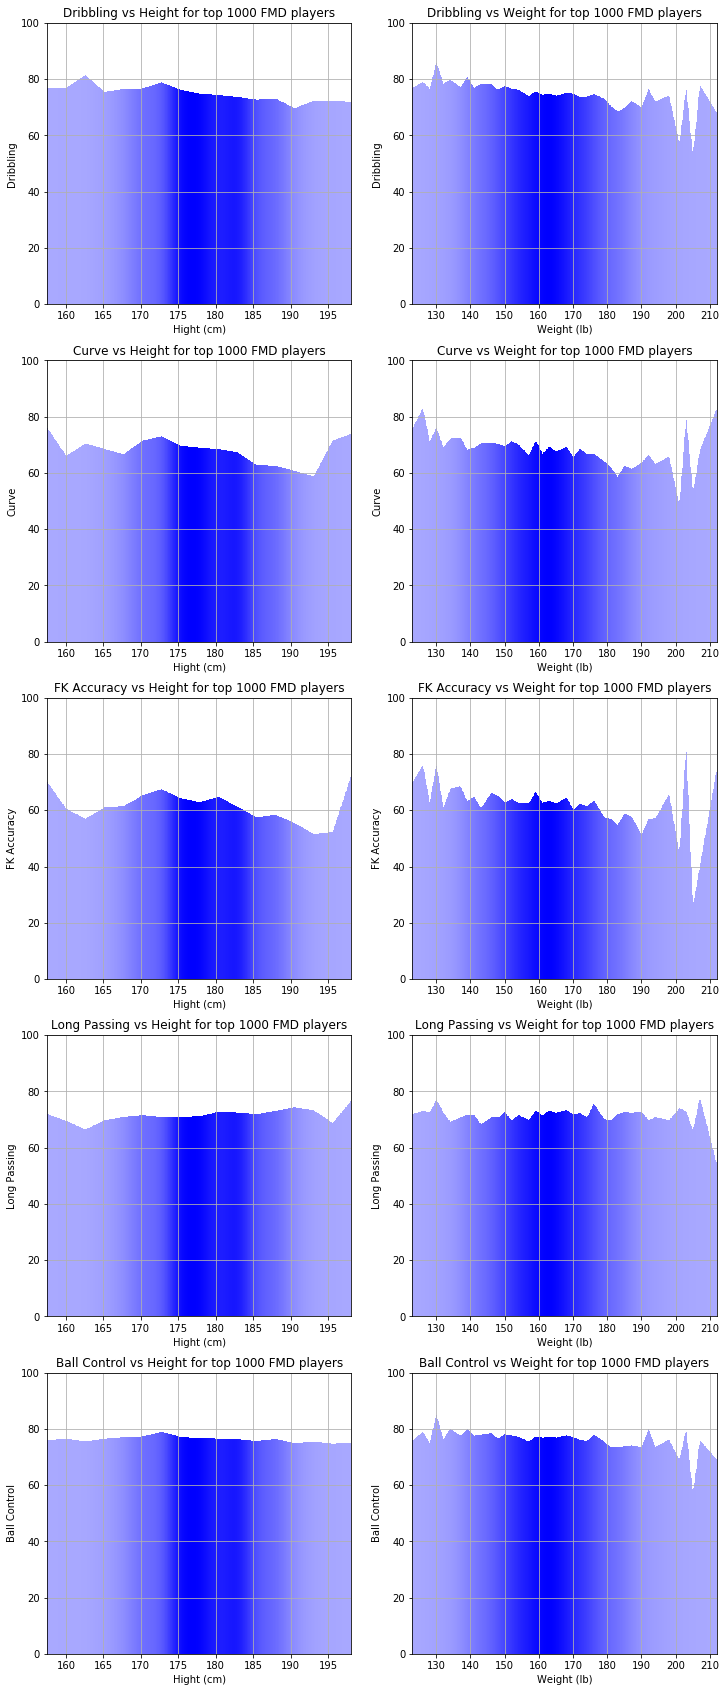

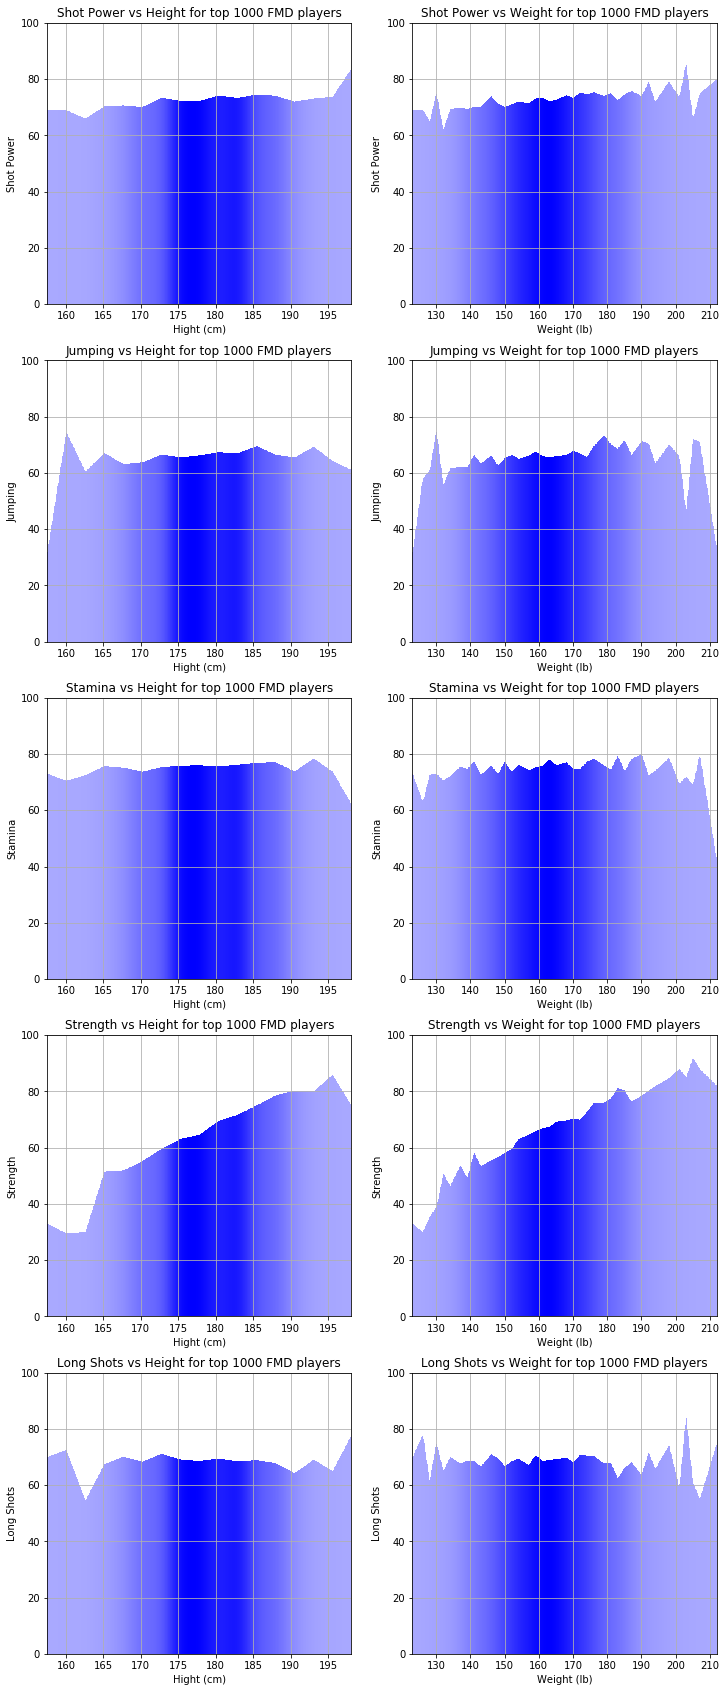

In [30]:
opt=mp.iloc[:1000,:]
optH=opt.groupby('Hight (cm)').mean()
optW=opt.groupby('Weight').mean()
optB=opt.groupby('BMI').mean()
x=[optH,optW,optB]
pWH(x,MA2,opt,'top 1000 FMD players','Movement attributes')
pWH(x,PA2,opt,'top 1000 FMD players','Power attributes')